# simple linear regression

In [ ]:
Building a simple linear regression model.

In [2]:
# Import packages
import pandas as pd
import seaborn as sns

In [3]:
# Load dataset
penguins = sns.load_dataset("penguins")

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Data cleaning

In [4]:
# Keep Adelie and Gentoo penguins, drop missing values

In [5]:
penguins_sub = penguins[penguins["species"] != "Chinstrap"]

In [6]:
penguins_final = penguins_sub.dropna()

In [7]:
penguins_final.reset_index(inplace=True, drop=True)

# Exploratory data analysis

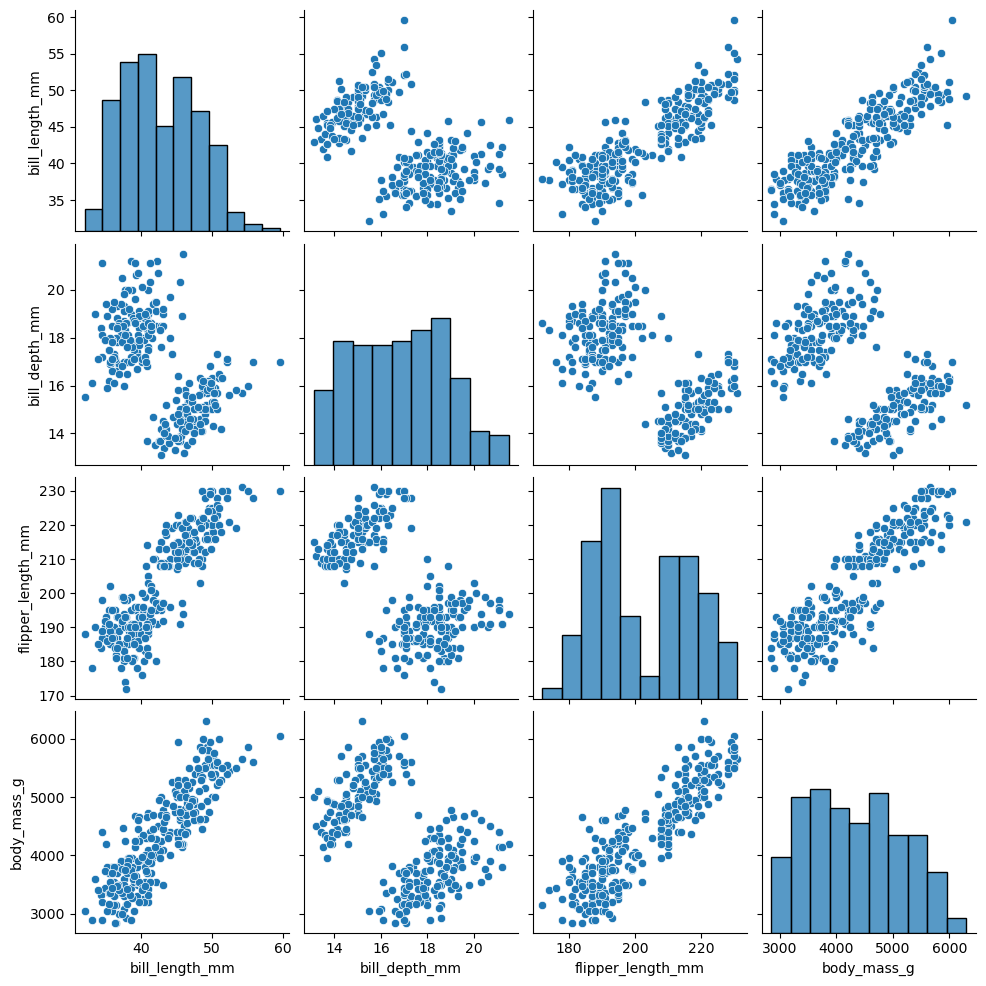

In [8]:
# Create pairwise scatterplots of data set
sns.pairplot(penguins_final)

From the scatterplot matrix, you can observe a few linear relationships:

bill length (mm) and flipper length (mm)

bill length (mm) and body mass (g)

flipper length (mm) and body mass (g)

# Model construction

Based on the above scatterplots, you could probably run a simple linear regression on any of the three relationships identified. For this part of the course, you will focus on the relationship between bill length (mm) and body mass (g).

To do this, you will first subset the variables of interest from the dataframe. You can do this by using double square brackets [[]], and listing the names of the columns of interest.

In [9]:
# Subset Data
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]

The names of the x and y variables have to exactly match the column names in the dataframe.

In [10]:
# Write out formula
ols_formula = "body_mass_g ~ bill_length_mm"

Lastly, you can build the simple linear regression model in statsmodels using the ols() function. You can import the ols() function directly using the line of code below.

In [11]:
# Import ols function
from statsmodels.formula.api import ols

Then, you can plug in the ols_formula and ols_data as arguments in the ols() function. After you save the results as a variable, you can call on the fit() function to actually fit the model to the data.

In [12]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

Lastly, you can call the summary() function on the model object to get the coefficients and more statistics about the model. The output from model.summary() can be used to evaluate the model and interpret the results. Later in this section, we will go over how to read the results of the model output

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           1.33e-85
Time:                        18:52:12   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

You can use the regplot() function from seaborn to visualize the regression line.

In [14]:
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

<AxesSubplot:xlabel='bill_length_mm', ylabel='body_mass_g'>

Finish checking model assumptions

Linearity

Normality

Independent observations

Homoscedasticity

In [15]:
# Subset X variable
X = ols_data["bill_length_mm"]

# Get predictions from model
fitted_values = model.predict(X)

In [16]:
# Calculate residuals
residuals = model.resid

# Check the normality assumption

To check the normality assumption, you can create a histogram of the residuals using the histplot() function from the seaborn package.

From the below histogram, you may notice that the residuals are almost normally distributed. In this case, it is likely close enough that the assumption is met.

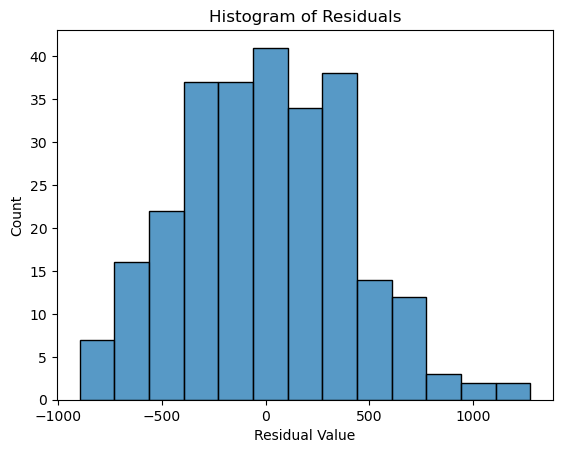

In [20]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Another way to check the normality function is to create a quantile-quantile or Q-Q plot. Recall that if the residuals are normally distributed, you would expect a straight diagonal line going from the bottom left to the upper right of the Q-Q plot. You can create a Q-Q plot by using the qqplot function from the statsmodels.api package.

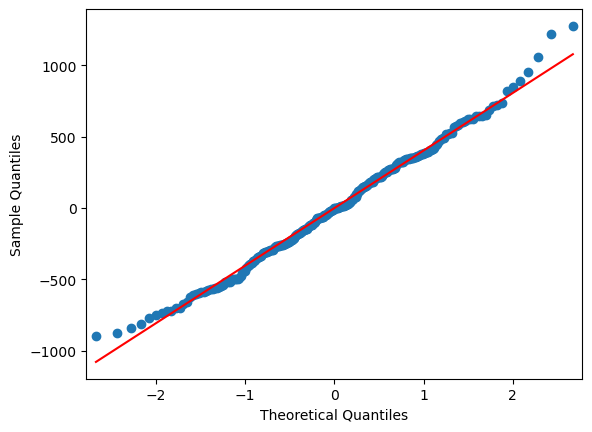

In [18]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

Check the homoscedasticity assumption

You can create one scatterplot by using the scatterplot() function from the seaborn package. The first argument is the variable that goes on the x-axis. The second argument is the variable that goes on the y-axis.

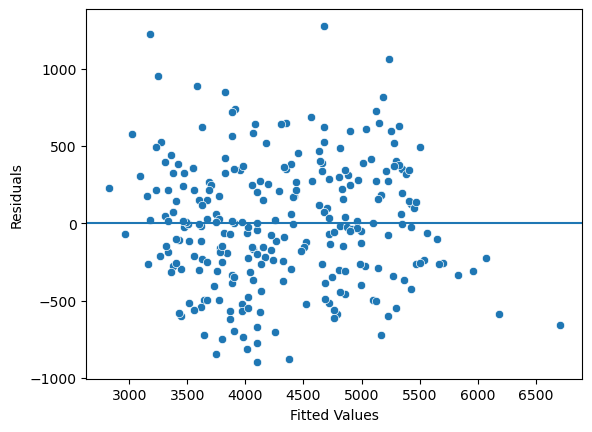

In [19]:
# Import matplotlib
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()